In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

df = pd.read_csv('/Users/sriyaraokakkera/Downloads/datasets/movies.csv')

In [2]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [6]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                        NaN     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      NaN  
7666          0                        NaN    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [7]:
df['correctyear'] = df['released'].astype(str).str.extract(r'(\d{4})')

df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime correctyear  
0      46998772               Warner Bros.    146.0        1980  
1      58853106          Columbia Pictures    104.0        1980  
2     538375067                  Lucasfilm    124.0        1980  
3      83453539         Paramount Pictures     88.0        1980  
4      39846344             Orion Pictures     98.0        1980  
...         ...                        ...      ...         ...  
7663          0                        NaN     90.0        2020  
7664          0  Cactus Blue Entertainment     90.0        2020  
7665          0           Embi Productions      NaN        2020  
7666          0                        NaN    120.0        2020  
7667          0                PK 65 Films    102.0        2020  

[7668 rows x 16 columns]

In [8]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name rating    genre  year  \
5445                                      Avatar  PG-13   Action  2009   
7445                           Avengers: Endgame  PG-13   Action  2019   
3045                                     Titanic  PG-13    Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13   Action  2015   
7244                      Avengers: Infinity War  PG-13   Action  2018   
...                                          ...    ...      ...   ...   
1617                             Mortal Passions      R    Crime  1989   
1614                              Edge of Sanity      R   Horror  1989   
1606                                   I, Madman      R  Fantasy  1989   
1601                        My Twentieth Century    NaN   Comedy  1989   
7667                                   Tee em el    NaN   Horror  2020   

                               released  score      votes        director  \
5445  December 18, 2009 (United States)    7.8  1100000.0   James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0   Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0   James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0     J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0   Anthony Russo   
...                                 ...    ...        ...             ...   
1617   January 26, 1990 (United States)    4.5      274.0     Andrew Lane   
1614     April 14, 1989 (United States)    5.2     1300.0  Gérard Kikoïne   
1606      April 7, 1989 (United States)    6.0     2900.0    Tibor Takács   
1601           January 13, 1990 (Japan)    7.1     1500.0   Ildikó Enyedi   
7667    August 19, 2020 (United States)    5.7        7.0    Pereko Mosia   

                  writer               star         country     budget  \
5445       James Cameron    Sam Worthington   United States  237000000   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000   
3045       James Cameron  Leonardo DiCaprio   United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000   
...                  ...                ...             ...        ...   
1617      Alan Moskowitz      Zach Galligan   United States          0   
1614          J.P. Félix    Anthony Perkins  United Kingdom          0   
1606       David Chaskin       Jenny Wright          Canada          0   
1601       Ildikó Enyedi       Dorota Segda         Hungary          0   
7667        Pereko Mosia   Siyabonga Mabaso    South Africa          0   

           gross                          company  runtime correctyear  
5445  2847246203            Twentieth Century Fox    162.0        2009  
7445  2797501328                   Marvel Studios    181.0        2019  
3045  2201647264            Twentieth Century Fox    194.0        1997  
6663  2069521700                        Lucasfilm    138.0        2015  
7244  2048359754                   Marvel Studios    149.0        2018  
...          ...                              ...      ...         ...  
1617           0          Gibraltar Entertainment     92.0        1990  
1614           0                    Allied Vision     85.0        1989  
1606           0  Trans World Entertainment (TWE)     89.0        1989  
1601           0         Budapest Stúdió Vállalat    104.0        1990  
7667           0                      PK 65 Films    102.0        2020  

[7668 rows x 16 columns]

In [9]:
pd.set_option('display.max_rows', None)

<Axes: >

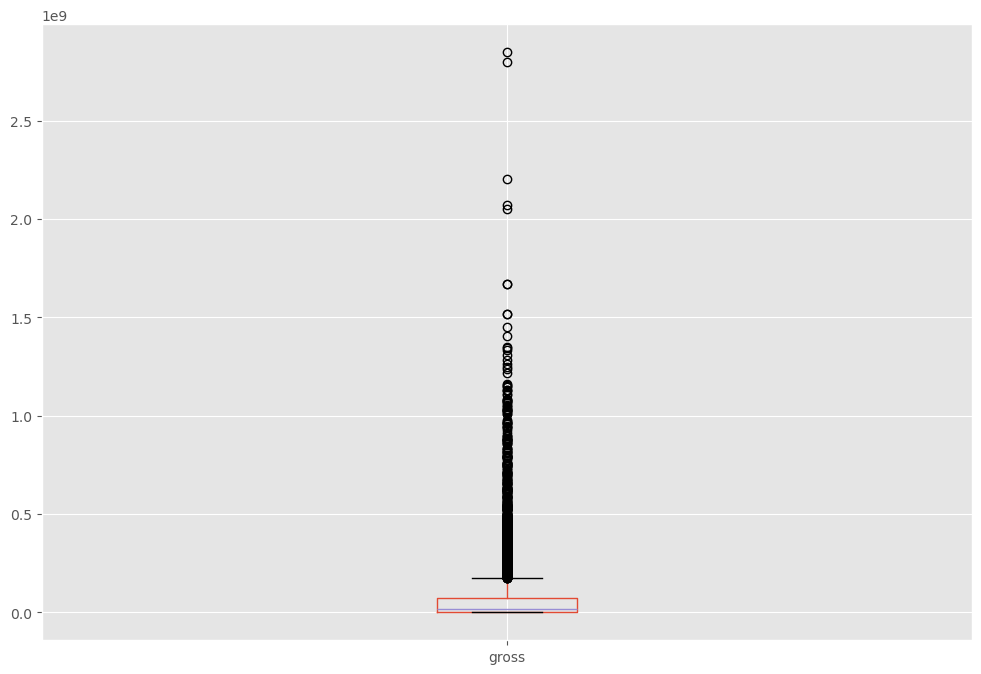

In [10]:
df.boxplot(column=['gross'])

In [11]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

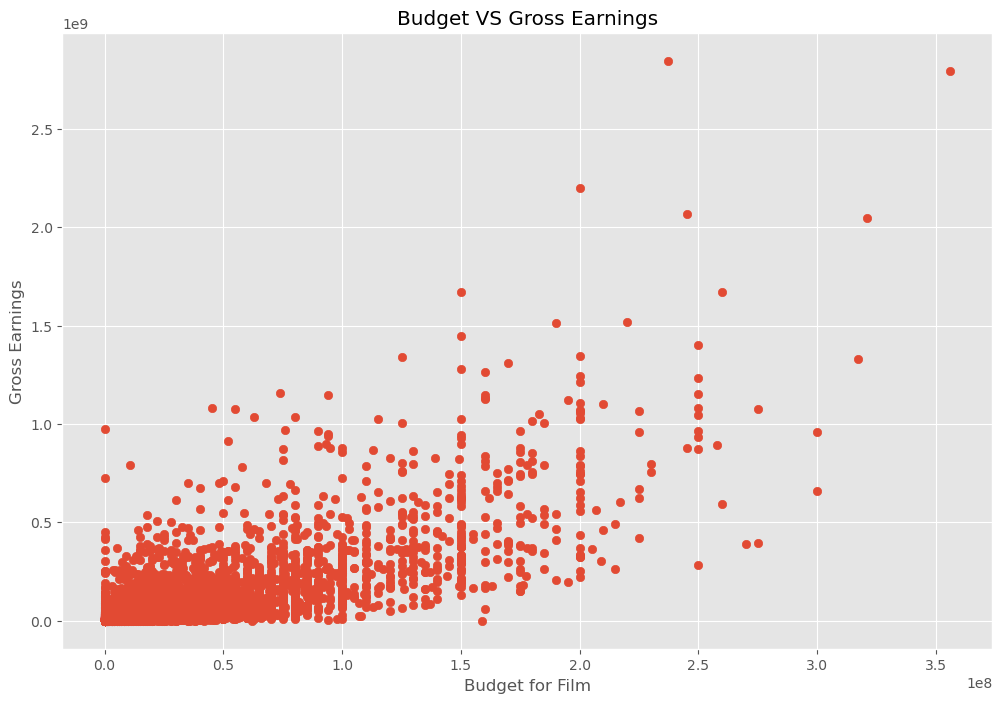

In [12]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget VS Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

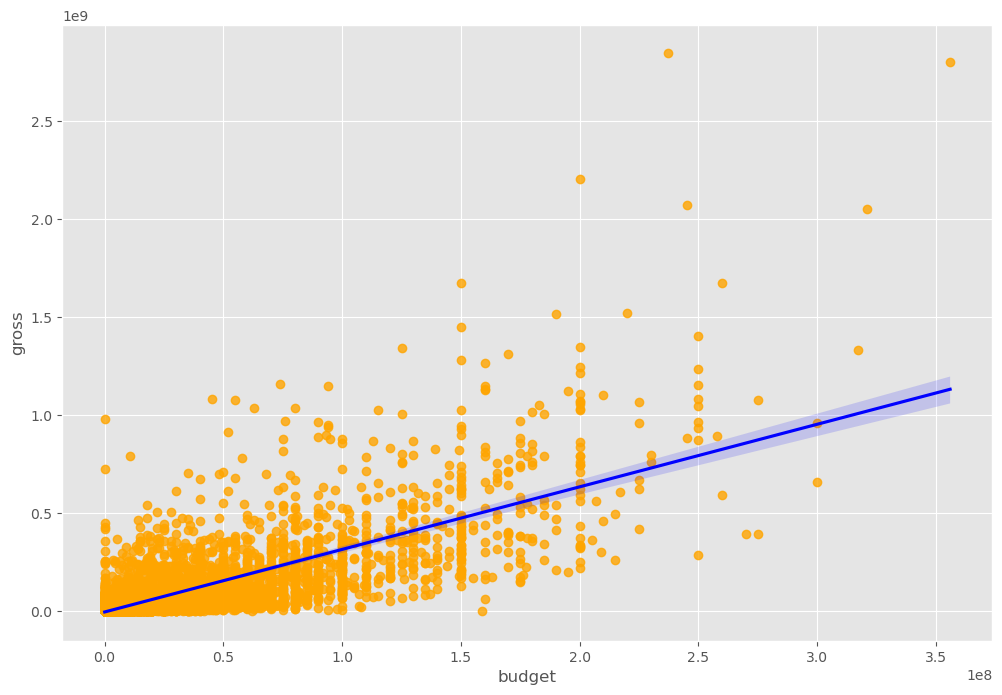

In [13]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "orange"}, line_kws={"color": "blue"})

In [14]:
df.corr(method='pearson', numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

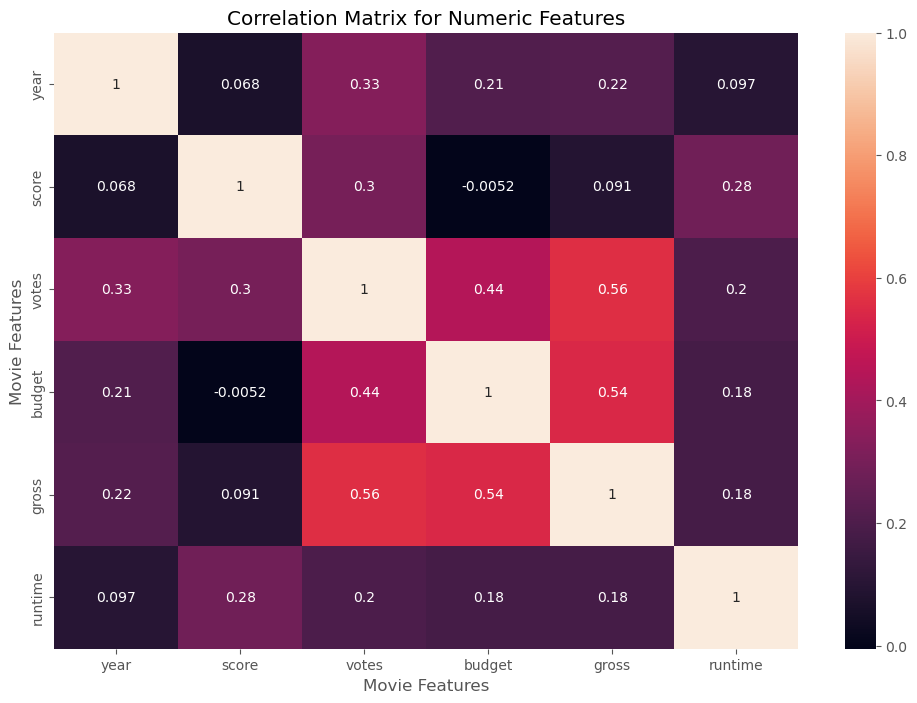

In [15]:
correlation_matrix = df.corr(method='kendall', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [16]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
5     2109       6     10  1980      2502    6.4   123000.0      2528    4362   
6     5574       6      0  1980      1771    7.9   188000.0      1412     838   
7     4436       6      3  1980       699    8.2   330000.0      1829    1769   
8     5281       4      0  1980      1753    6.8   101000.0      2306    1979   
9     6213       6      3  1980      2286    7.0    10000.0      2864     423   
10     463       4      0  1980       674    6.1    18000.0       357    3985   
11    5920       4      1  1980      2987    7.3    54000.0      1199    1832   
12    4315       4      1  1980       626    5.3    30000.0      2352    2333   
13    4084       6      6  1980      3211    7.7    49000.0      2388    2327   
14    1687       6      5  1980      1543    7.1    37000.0       318     520   
15    5024       4      6  1980      3021    7.2    27000.0      1243    3548   
16    1900       6      6  1980      2286    6.6    21000.0        49     735   
17      92       4      4  1980       699    6.9    29000.0       514    3262   
18    5865       6     10  1980      1108    6.8    66000.0      1374    2104   
19    5189       6      4  1980       626    6.8    26000.0      2561     556   
20    1387       6      5  1980       945    6.5    20000.0      2891    4451   
21    2451       6      1  1980       160    6.8    14000.0      1892    2926   
22    5845       4      0  1980       281    6.7    22000.0       744    4192   
23    7445       4      8  1980       585    5.3    12000.0      2371    3528   
24    7127       4      6  1980      1913    6.4    14000.0      1153      12   
25     346       6     10  1980       773    6.9    33000.0      1583    3234   
26    3263       6      4  1980      2059    6.5     5100.0      2433    2483   
27    4442       4      0  1980       281    5.0     4100.0      1282      33   
28     980       6      5  1980      1771    7.2    17000.0      2673    4386   
29     362       6      5  1980       886    6.2    22000.0      2151    3326   
30    3796       4      4  1980      3296    7.1     8900.0      2811      83   
31    4373       6     10  1980      1467    5.4    16000.0      2143    4455   
32    4987       4      0  1980       342    5.3    15000.0      1041    1587   
33    1103       4      6  1980       160    6.1      604.0      1644     958   
34    4785       4      4  1980       699    6.7     9100.0      1225    3136   
35    4362       6      4  1980      2818    6.2    24000.0      1091    3107   
36    6008       6      4  1980      2452    6.3     4300.0       855    1358   
37    3721       6      4  1980      2965    6.0    11000.0      1598    3642   
38    6102       4      6  1980       699    5.9     4000.0      2296    3826   
39    1244       4      3  1980      2195    7.5    17000.0      1884    4201   
40    6748       4      7  1980      3101    6.3     5700.0      1403     518   
41     927       4      6  1980      1588    7.9    13000.0       335    2252   
42    6644       6      0  1980      1836    7.1     9000.0      2314    2543   
43    7305       6      3  1980       169    6.6    11000.0       186    1682   
44    5504       6     10  1980      3042    4.8     2000.0      1978     151   
45    1152       6      4  1980      1467    6.1    12000.0      2804    4298   
46    6094       6      0  1980      1705    5.3     3900.0      1934    3357   
47    5578       6     10  1980      2775    4.6     3900.0      2836    4344   
48    6360       4      0  1980      

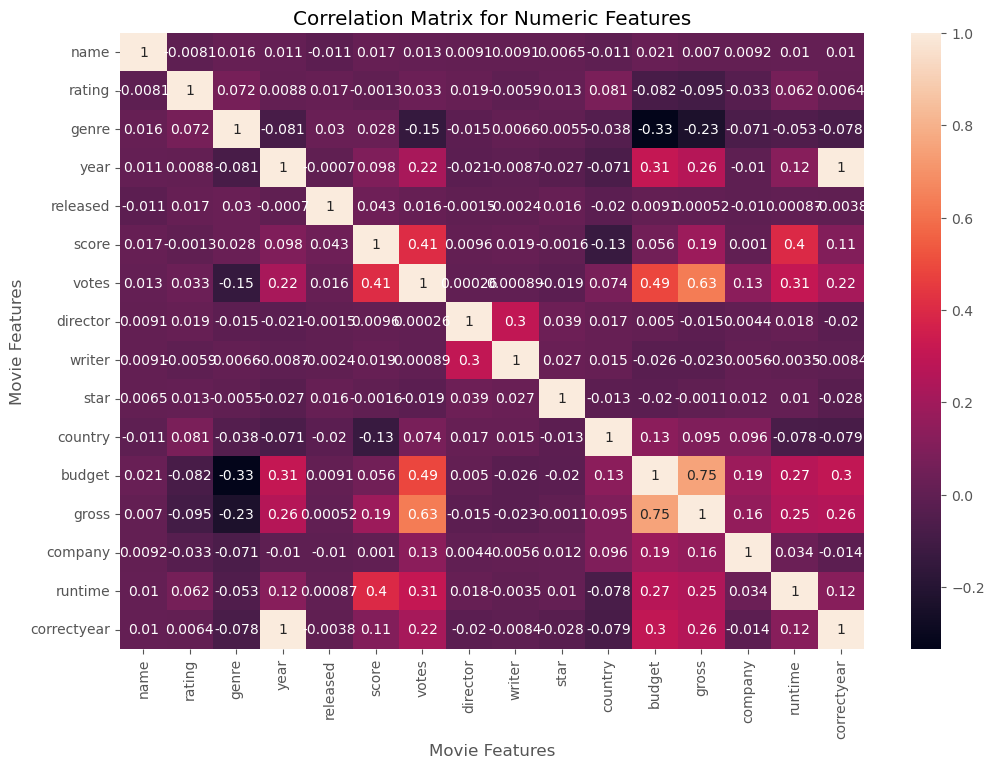

In [17]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [18]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             correctyear    0.010225
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [19]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      correctyear   -0.079009
correctyear  country       -0.079009
runtime      country       -0.078412
country      runtime       -0.078412
correctyear  genre         -0.078210
genre        correctyear   -0.078210
             company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052711
genre        runtime       -0.052711
country      genre         -0.037615
g

In [20]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.632834
votes        gross          0.632834
gross        budget         0.750157
budget       gross          0.750157
correctyear  year           0.996397
year         correctyear    0.996397
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64